In [63]:
#importing all necessary libraries
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import collections
import matplotlib.pyplot as plt
import seaborn


Importing Dataset

In [64]:
#reading dataset from csv file to a dataframe
jazz_dataset = pd.read_csv("audio_features_df.csv", index_col=False)
jazz_dataset.head()

,track_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,timesig,popularity,duration_ms,year_released
0,3cuOpppX5ZNOQ843dPeFB4,0.701,0.444,10,-10.272,1,0.0358,0.898,0.000003,0.260,0.8430,126.401,4,44,172773,1964
1,6a5XgyiyTG5Ok7cZ1LMLGh,0.149,0.111,4,-24.803,0,0.0333,0.725,0.647000,0.071,0.0326,82.399,4,11,346333,1978
2,4ZVZBc5xvMyV3WzWktn8i7,0.807,0.497,7,-10.656,1,0.0297,0.306,0.032300,0.043,0.7650,114.523,4,65,141506,1969
3,1Y5YesFGgIlV7SnfE13G8k,0.515,0.205,7,-17.959,0,0.0369,0.871,0.033900,0.147,0.4520,80.970,4,2,325611,1990
4,29U7stRjqHU6rMiS8BfaI9,0.271,0.165,5,-20.652,1,0.0351,0.729,0.000002,0.118,0.2030,77.082,4,68,139226,1968


In [65]:

#dropping any rows that have a currupted target value
jazz_dataset.drop(jazz_dataset[jazz_dataset['year_released'] == 0].index, inplace = True)

#changing all songs from before the 1940s to the 1940s to account for outliers
jazz_dataset.loc[jazz_dataset['year_released'] < 1940, 'year_released'] = 1940



In [66]:
#to get a standardized data set to use whenever we are want to get our dataset

#creating a method to initialize data
def scale_data(dataset, scalar = StandardScaler()):
    
    # prepare features 
    data = dataset.copy()
    
    #initialize an empty target list to store values while we scale the features
    target = []
    
    #iterate through all target values
    for year in data['year_released']:
        #take the first three digits (these tell us the decade)
        decade = int(str(year)[:3])
        #append these values to our temporary target value list
        target.append(decade)
        
    #drop unnecessary columns, year_released to be added later as 'decade'
    data = data.drop(['track_id','year_released'], axis=1)

    #scale features
    columns = data.columns
    scaled_features = scalar.fit_transform(data)
    scaled_dataset = pd.DataFrame(scaled_features, columns= columns)
    
    #mapping values to each decade of the target column
    dec_key = {194:0,195:1,196:2,197:3,198:4,199:5,200:6,201:7,202:8}
    
    #add the target values back to finalize our dataset
    target = (pd.Series(target)).map(dec_key)
    scaled_dataset['decade'] = target

    return scaled_dataset



In [67]:
#getting a scaled dataset of decades
scaled_jazz_dataset_category = scale_data(jazz_dataset)
scaled_jazz_dataset_category.head()

#key for class categories
#0: 1940s
#1: 1950s
#2: 1960s
#3: 1970s
#4: 1980s
#5: 1990s
#6: 2000s
#7: 2010s
#8: 2020s

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,timesig,popularity,duration_ms,decade
0,1.034887,0.140746,1.395394,0.545107,0.850204,-0.381094,0.911636,-0.903755,0.608759,1.355119,0.415654,0.278752,0.559906,-0.797792,2
1,-2.601239,-1.268976,-0.325281,-2.437394,-1.176188,-0.426385,0.381263,0.787265,-0.656529,-1.828083,-1.099670,0.278752,-1.412387,0.373163,3
2,1.733129,0.365116,0.535056,0.466291,0.850204,-0.491605,-0.903283,-0.819344,-0.843979,1.048740,0.006604,0.278752,1.815002,-1.008741,2
3,-0.190329,-0.871037,0.535056,-1.032657,-1.176188,-0.361166,0.828861,-0.815162,-0.147736,-0.180705,-1.148881,0.278752,-1.950285,0.233358,5
4,-1.797602,-1.040372,-0.038502,-1.585397,0.850204,-0.393776,0.393526,-0.903760,-0.341881,-1.158762,-1.282775,0.278752,1.994301,-1.024123,2


Preliminary Data Exploration

distribution count for each decade:
1940s: 165
1950s: 1691
1960s: 2841
1970s: 2374
1980s: 1074
1990s: 2477
2000s: 3192
2010s: 4094
2020s: 2158




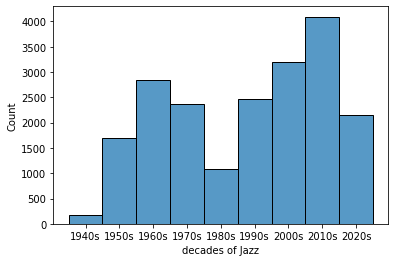

In [68]:
#to show the distribution of the decades for our data exploration

#init empty list to store decades
decades = []

#iterate through each value in our target column 
for year in jazz_dataset['year_released']:
    #pull the decade from it
    decade = int(str(year)[:3])
    
    #create a label for it (i.e 1940s, 1990s, 2010s)
    label = str(decade) + '0s'
    
    #add the label to the temporary store
    decades.append(label)

#initialize a counter to count number of occurences of each value
counter=collections.Counter(decades)

#sort the count
count = sorted(counter.items(), key=lambda i: i[0])

#to display result
print('distribution count for each decade:')

#for each decade label print the label and the frequency
for key in count:
    print(f'{key[0]}: {key[1]}')
    
print('\n')
    
#sort the decades list so that it can be displayed
decades = sorted(decades, key= lambda i: i[:3])

#display the histogram of decades
dis = pd.Series(decades, name="decades of Jazz")
ax = sns.histplot(dis)


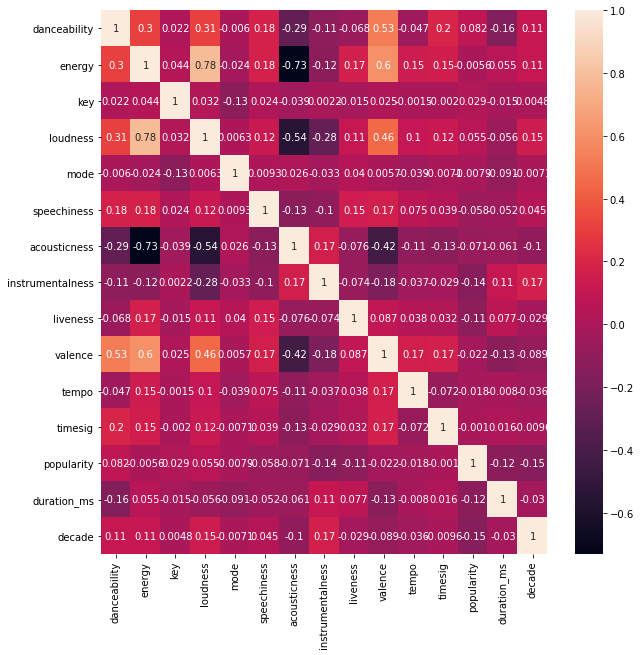

In [69]:
#to show a correlation matrix of our features to our target
fig, ax = plt.subplots(figsize=(10,10))
seaborn.heatmap(scaled_jazz_dataset_category.corr(), annot=True, ax=ax)
plt.show()

In [70]:
#importing metrics to use

In [71]:
# importing the necessary packages
from sklearn.metrics import (
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score,
    accuracy_score,
    roc_auc_score,
)

from sklearn.model_selection import cross_val_score

Logistic Regression

In [72]:
from sklearn.linear_model import LogisticRegressionCV

In [73]:
#prepping data for modeling
from sklearn.model_selection import train_test_split

#prepping features
x = scaled_jazz_dataset_category.drop(['decade'], axis=1)


#prepping target
y = scaled_jazz_dataset_category['decade']


#shuffling the dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, shuffle= True)


Testing Results:
--------------------------
Accuracy: 0.2940003986446083
Error: 0.7059996013553917
Precision: 0.27024546326489873
Recall: 0.2960064218342364
F1 Score: 0.26723060175938107
AUC: 0.6892807553315784

Training Results:
--------------------------
Accuracy: 0.29357432387534055
Error: 0.7064256761246595
Precision: 0.2915946163130573
Recall: 0.2961522992358225
F1 Score: 0.2679124550159356
AUC: 0.6939677670091446



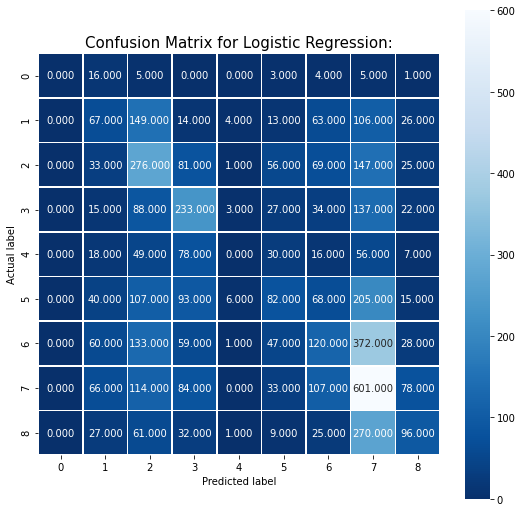

In [74]:
#to implement multi-class logistic regression w cross validation

log_model = LogisticRegressionCV(multi_class = 'multinomial', cv = 5, max_iter=1000)
log_model.fit(x_train, y_train)

#to make predictions for the testing set
y_test_pred = log_model.predict(x_test)

#to make predictions for the training set
y_train_pred = log_model.predict(x_train)

#output metrics for testing set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_error = 1 - test_accuracy
test_precision = precision_score(y_test, y_test_pred, average= 'weighted', labels=np.unique(y_test_pred))
test_recall = recall_score(y_test, y_test_pred, average= 'weighted', labels=np.unique(y_test_pred))
test_F1_score = f1_score(y_test, y_test_pred, average = 'weighted', labels=np.unique(y_test_pred))
test_auc = roc_auc_score(y_test, log_model.predict_proba(x_test), multi_class='ovr', average='weighted')

#output metrics for training set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_error = (1 - train_accuracy)
train_precision = precision_score(y_train, y_train_pred, average= 'weighted', labels=np.unique(y_train_pred))
train_recall = recall_score(y_train, y_train_pred, average= 'weighted', labels=np.unique(y_train_pred))
train_F1_score = f1_score(y_train, y_train_pred, average = 'weighted', labels=np.unique(y_train_pred))
train_auc = roc_auc_score(y_train, log_model.predict_proba(x_train), multi_class='ovr', average='weighted')


print(f"""Testing Results:
--------------------------
Accuracy: {test_accuracy}
Error: {test_error}
Precision: {test_precision}
Recall: {test_recall}
F1 Score: {test_F1_score}
AUC: {test_auc}
""")

print(f"""Training Results:
--------------------------
Accuracy: {train_accuracy}
Error: {train_error}
Precision: {train_precision}
Recall: {train_recall}
F1 Score: {train_F1_score}
AUC: {train_auc}
""")

#display confusion matrix with final result
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix for Logistic Regression:'
plt.title(all_sample_title, size = 15);



k-nearest neighbors classifier

In [75]:
from sklearn.neighbors import KNeighborsClassifier

optimal value for K: 3


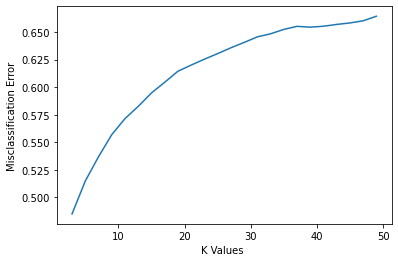

In [76]:
#to find optimal value for K
neighbors = [x for x in range(3,50,2)]

# empty list that will hold cv scores
cv_scores = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x, y, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())
    
#graphical view
#misclassification error
MSE = [1-x for x in cv_scores]

#optimal K
optimal_k_index = MSE.index(min(MSE))
optimal_k = neighbors[optimal_k_index]
print(f'optimal value for K: {optimal_k}')

# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('K Values ')
plt.ylabel('Misclassification Error')
plt.show()

Testing Results:
--------------------------
Accuracy: 0.5232210484353199
Error: 0.4767789515646801
Precision: 0.5181506673584912
Recall: 0.5232210484353199
F1 Score: 0.5109186481838899
AUC: 0.7958567892047403

Training Results:
--------------------------
Accuracy: 0.7335371121004718
Error: 0.2664628878995282
Precision: 0.7384846090185839
Recall: 0.7335371121004718
F1 Score: 0.7272927875613308
AUC: 0.971408341543393



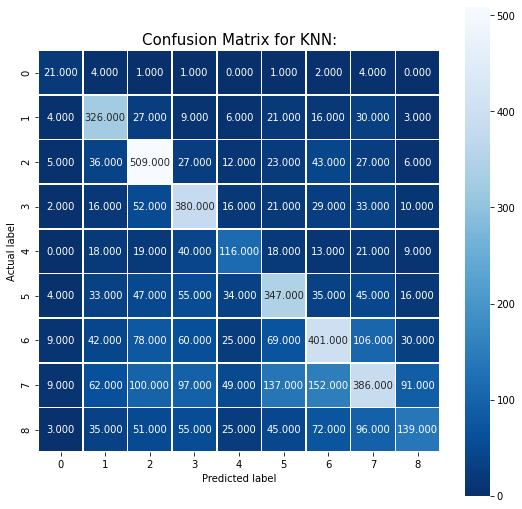

In [77]:
#to implement multi-class knn classifier w k=3
knn_model = KNeighborsClassifier(n_neighbors = 3)

knn_model.fit(x_train, y_train)

#to make predictions for the testing set
y_test_pred = knn_model.predict(x_test)

#to make predictions for the training set
y_train_pred = knn_model.predict(x_train)

#display metrics for the testing set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_error = 1 - test_accuracy
test_precision = precision_score(y_test, y_test_pred, average= 'weighted')
test_recall = recall_score(y_test, y_test_pred, average= 'weighted')
test_F1_score = f1_score(y_test, y_test_pred, average = 'weighted')
test_auc = roc_auc_score(y_test, knn_model.predict_proba(x_test), multi_class='ovr', average='weighted')

#display metrics for the training set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_error = (1 - train_accuracy)
train_precision = precision_score(y_train, y_train_pred, average= 'weighted')
train_recall = recall_score(y_train, y_train_pred, average= 'weighted')
train_F1_score = f1_score(y_train, y_train_pred, average = 'weighted')
train_auc = roc_auc_score(y_train, knn_model.predict_proba(x_train), multi_class='ovr', average='weighted')


print(f"""Testing Results:
--------------------------
Accuracy: {test_accuracy}
Error: {test_error}
Precision: {test_precision}
Recall: {test_recall}
F1 Score: {test_F1_score}
AUC: {test_auc}
""")

print(f"""Training Results:
--------------------------
Accuracy: {train_accuracy}
Error: {train_error}
Precision: {train_precision}
Recall: {train_recall}
F1 Score: {train_F1_score}
AUC: {train_auc}
""")

#display confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix for KNN:'
plt.title(all_sample_title, size = 15);


Random Forest Classifier

In [78]:
from sklearn.ensemble import RandomForestClassifier

optimal n_learners value: 43


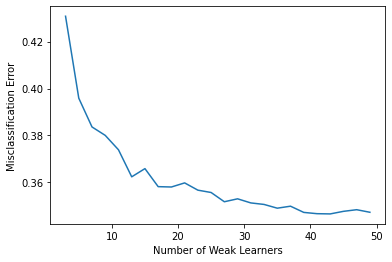

In [79]:
#hyper parameter tuning
n_learners = [x for x in range(3,50,2)]
# empty list that will hold cv scores
cv_scores = []
for n in n_learners:
    rf = RandomForestClassifier(n_estimators=n, criterion='entropy')
    scores = cross_val_score(rf, x, y, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    
#misclassification error
MSE = [1-x for x in cv_scores]

#optimal weak learner value
optimal_n_learners_index = MSE.index(min(MSE))
optimal_n_learners = n_learners[optimal_n_learners_index]
print(f'optimal n_learners value: {optimal_n_learners}')


# plot misclassification error 
plt.plot(n_learners, MSE)
plt.xlabel('Number of Weak Learners')
plt.ylabel('Misclassification Error')
plt.show()

Testing Results:
--------------------------
Accuracy: 0.6477974885389675
Error: 0.35220251146103254
Precision: 0.6602822874234848
Recall: 0.6477974885389675
F1 Score: 0.6486460583040677
AUC: 0.9091100925757997

Training Results:
--------------------------
Accuracy: 1.0
Error: 0.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
AUC: 1.0



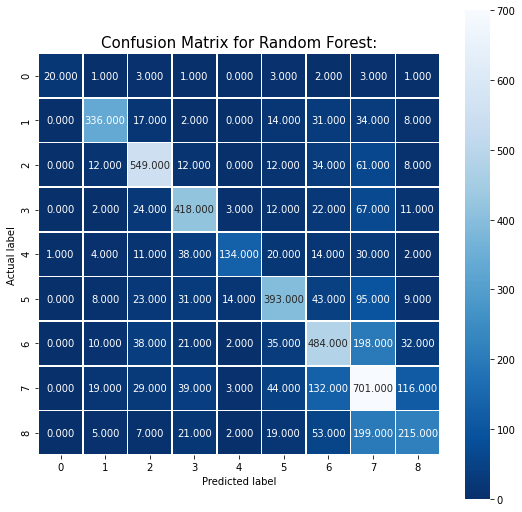

In [80]:
# importing necessary libraries

# training a random forest classifier
rf_model = RandomForestClassifier(n_estimators=41)

rf_model.fit(x_train, y_train)

#to make predictions for the testing set
y_test_pred = rf_model.predict(x_test)

#to make predictions for the training set
y_train_pred = rf_model.predict(x_train)

#display metrics for the testing set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_error = 1 - test_accuracy
test_precision = precision_score(y_test, y_test_pred, average= 'weighted')
test_recall = recall_score(y_test, y_test_pred, average= 'weighted')
test_F1_score = f1_score(y_test, y_test_pred, average = 'weighted')
test_auc = roc_auc_score(y_test, rf_model.predict_proba(x_test), multi_class='ovr', average='weighted')

#display metrics for the training set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_error = (1 - train_accuracy)
train_precision = precision_score(y_train, y_train_pred, average= 'weighted')
train_recall = recall_score(y_train, y_train_pred, average= 'weighted')
train_F1_score = f1_score(y_train, y_train_pred, average = 'weighted')
train_auc = roc_auc_score(y_train, rf_model.predict_proba(x_train), multi_class='ovr', average='weighted')


print(f"""Testing Results:
--------------------------
Accuracy: {test_accuracy}
Error: {test_error}
Precision: {test_precision}
Recall: {test_recall}
F1 Score: {test_F1_score}
AUC: {test_auc}
""")

print(f"""Training Results:
--------------------------
Accuracy: {train_accuracy}
Error: {train_error}
Precision: {train_precision}
Recall: {train_recall}
F1 Score: {train_F1_score}
AUC: {train_auc}
""")

#display confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix for Random Forest:'
plt.title(all_sample_title, size = 15);
